**CLASSIFICATION OF FETAL HEALTH USING MACHINE LEARNING**


**INTRODUCTION**


The reduction of child and maternal mortality is central to the United Nations' Sustainable Development Goals (SDGs), with the global aim to reduce under-5 mortality to below 25 per 1,000 live births by 2030. Alongside child mortality, maternal mortality remains a critical issue, with 295,000 deaths occurring during and after pregnancy, 94% of which are in low-resource settings. Most of these deaths are preventable with timely medical intervention, emphasizing the need for better monitoring and early detection of complications.

Cardiotocograms (CTGs) serve as a simple, cost-effective method to assess fetal health, providing real-time data about the fetal heart rate (FHR), fetal movements, and uterine contractions. By analyzing these parameters, healthcare professionals can take action to prevent potential risks to both the mother and fetus, reducing the chances of mortality during childbirth.

This project leverages machine learning to analyze a dataset of 2,126 CTG records, each classified by expert obstetricians into three categories: Normal, Suspect, and Pathological. By applying machine learning techniques, we aim to develop a model that can automatically classify fetal health based on CTG data, enhancing the efficiency and accuracy of prenatal care. The ultimate goal is to assist healthcare professionals in making timely, data-driven decisions, especially in low-resource settings, thereby improving maternal and child health outcomes worldwide.

**AIMS**


The primary aim of this project is to leverage machine learning techniques to enhance the accuracy and efficiency of fetal health monitoring using Cardiotocogram (CTG) data. CTGs, which provide essential insights into fetal heart rate (FHR), fetal movements, and uterine contractions, are a widely used tool to assess fetal well-being during pregnancy. Early detection of complications such as fetal distress or abnormal uterine contractions is crucial in preventing adverse outcomes for both the mother and child, ultimately reducing the risks of maternal and child mortality.

**OBJECTIVES**

**1.Data Preprocessing and Feature Extraction:**

* Clean and preprocess the CTG dataset, ensuring it is ready for machine learning analysis.
* Extract relevant features from the CTG records, such as fetal heart rate (FHR), uterine contractions, and fetal movements, which are crucial for assessing fetal health

**2.Model Development:**

* Train various machine learning models (e.g., Decision Trees, Support Vector Machines, Random Forest, Neural Networks) to classify the CTG data into the three categories: **Normal, Suspect,** and **Pathological**.
* Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score to ensure that the model provides reliable predictions.

**3.Model Optimization:**

  Fine-tune the selected model(s) by optimizing hyperparameters to improve classification accuracy and reduce errors, particularly in detecting Pathological cases, where early intervention is most critical.

** 4.Real-time Prediction :**

 Develop a system that can take real-time CTG data input and provide immediate classification results to assist healthcare professionals in making timely decisions during prenatal care.

**5.Validation and Testing:**

Test the developed model using a separate validation dataset to assess its generalizability and robustness. Cross-validation techniques will be employed to avoid overfitting and ensure the model's effectiveness in diverse clinical settings.

**6.Support Decision-Making:**

Provide healthcare practitioners with a reliable tool to support decision-making, enabling them to identify high-risk pregnancies early and take appropriate action to prevent complications, such as fetal distress, preterm labor, or intrauterine growth restriction.

**7.Contribute to Global Health Initiatives:**

Align with the United Nations' Sustainable Development Goals (SDGs) by contributing to efforts aimed at reducing maternal and child mortality, especially in low-resource settings where access to advanced healthcare may be limited.

**DATA ANALYSIS :**

**1. Exploratory Data Analysis (EDA)**


EDA helps to understand the distribution and relationships among the variables. The primary
tasks involved are:

* Data Visualization: Using visual tools bar plot, box plots, and scatter plots to inspect the distribution of variables and identify trends.

**2. Feature Importance**

 Feature selection techniques, such as decision trees or random forests, can be used to assess which input features contribute the most to predicting fetal health.




In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df=pd.read_csv("/content/fetal_health.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
df.dtypes

,0
baseline value,float64
accelerations,float64
fetal_movement,float64
uterine_contractions,float64
light_decelerations,float64
severe_decelerations,float64
prolongued_decelerations,float64
abnormal_short_term_variability,float64
mean_value_of_short_term_variability,float64
percentage_of_time_with_abnormal_long_term_variability,float64


In [4]:
df.isna().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [5]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
X=df.iloc[:,:-1]
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [7]:
Y=df.iloc[:,-1]
Y

,fetal_health
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2121,2.0
2122,2.0
2123,2.0
2124,2.0


In [8]:
over=SMOTE()
X,Y=over.fit_resample(X,Y)

In [9]:
Y.value_counts()

,count
fetal_health,
2.0,1655
1.0,1655
3.0,1655


In [10]:
scaler=MinMaxScaler()
scaler.fit(X)
x_scaled=scaler.fit_transform(X)
x_scaled

array([[0.25925926, 0.        , 0.        , ..., 0.40366972, 0.27137546,
        1.        ],
       [0.48148148, 0.31578947, 0.        , ..., 0.57798165, 0.04460967,
        0.5       ],
       [0.5       , 0.15789474, 0.        , ..., 0.55963303, 0.04832714,
        0.5       ],
       ...,
       [0.82667685, 0.        , 0.00473288, ..., 0.75047554, 0.        ,
        0.55990833],
       [0.7037037 , 0.        , 0.004158  , ..., 0.62385321, 0.        ,
        0.        ],
       [0.36045094, 0.        , 0.03787867, ..., 0.06155104, 0.40283359,
        0.        ]])

In [11]:
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(x_scaled)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,Y,test_size=0.3,random_state=1)

In [13]:
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
sv=SVC(probability=True)
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3)
lst=[knn,rf,ab,sv,gbc,]
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

         1.0       0.97      0.90      0.94       518
         2.0       0.90      0.96      0.93       474
         3.0       0.97      0.99      0.98       498

    accuracy                           0.95      1490
   macro avg       0.95      0.95      0.95      1490
weighted avg       0.95      0.95      0.95      1490

RandomForestClassifier()
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.96       518
         2.0       0.93      0.98      0.95       474
         3.0       0.98      0.98      0.98       498

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490

AdaBoostClassifier()
              precision    recall  f1-score   support

         1.0       0.86      0.84      0.85       518
         2.0       0.75      0.87      0.80       474
      

In [14]:
rt1=RandomForestClassifier()
parameter={"criterion":["gini","entropy","log_loss"],
           "max_features":["sqrt","log2"],
           "class_weight":["balanced","balanced_subsample"]}
clf=GridSearchCV(rt1,parameter,cv=10,scoring="accuracy")
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [15]:
print(clf.best_params_)

{'class_weight': 'balanced_subsample', 'criterion': 'log_loss', 'max_features': 'log2'}


In [16]:
rf=RandomForestClassifier(class_weight='balanced',criterion="log_loss",max_features="sqrt")
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='log_loss')

In [17]:
y_pred=rf.predict(x_test)
y_pred

array([2., 3., 2., ..., 2., 1., 3.])

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.99      0.93      0.96       518
         2.0       0.93      0.98      0.95       474
         3.0       0.98      0.98      0.98       498

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



<ipython-input-19-4442ca2ce6aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot =sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')


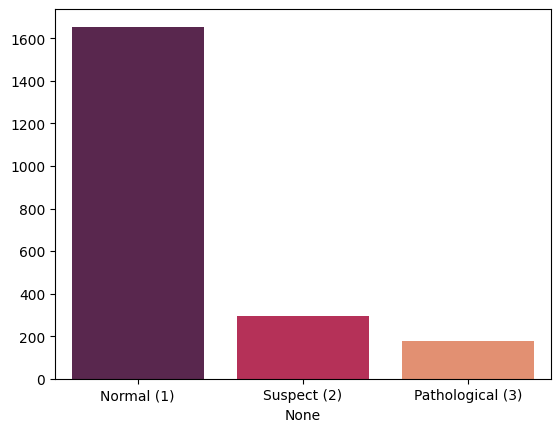

In [19]:
fetal_health_counts = df['fetal_health'].value_counts()
fetal_health_counts.index = ['Normal (1)', 'Suspect (2)', 'Pathological (3)']
bar_plot =sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')


In [20]:
joblib.dump(rf,"model.project")

['model.project']

In [21]:
%%writefile app.py
import streamlit as st
import joblib
model=joblib.load('model.project')
st.title('Fetal Health Prediction')
baseline_value=st.slider('baseline value',106.000000,160.000000)
accelerations =st.slider('accelerations',0.000000,0.019000)
fetal_movement=st.slider('fetal_movement',0.000000,0.481000	)
uterine_contractions=st.slider('uterine_contractions',0.000000,0.015000)
light_decelerations=st.slider('light_decelerations',0.000000,0.015000)
severe_decelerations=st.slider('severe_decelerations',0.000000,0.001000)
prolongued_decelerations=st.slider('prolongued_decelerations',0.000000,0.005000	)
abnormal_short_term_variability=st.slider('abnormal_short_term_variability',12.000000,87.000000)
mean_value_of_short_term_variability=st.slider('mean_value_of_short_term_variability',0.200000,7.000000	)
percentage_of_time_with_abnormal_long_term_variability=st.slider('percentage_of_time_with_abnormal_long_term_variability',0.00000,91.00000)
mean_value_of_long_term_variability=st.slider('mean_value_of_long_term_variability',0.000000,50.700000)
histogram_width=st.slider('histogram_width',3.000000,180.000000)
histogram_min=st.slider('histogram_min',50.000000,159.000000)
histogram_max=st.slider('histogram_max',122.000000,238.000000)
histogram_number_of_peaks=st.slider('histogram_number_of_peaks',0.000000,18.000000)
histogram_number_of_zeroes=st.slider('histogram_number_of_zeroes',0.000000,10.000000)
histogram_mode=st.slider('histogram_mode',60.000000,187.000000)
histogram_mean=st.slider('histogram_mean',73.000000,182.000000)
histogram_median=st.slider('histogram_median',77.000000,186.000000)
histogram_variance=st.slider('histogram_variance',0.000000,269.000000)
histogram_tendency=st.slider('histogram_tendency',-1.000000,1.000000)
input=[[baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency]]
model=joblib.load('model.project')
if st.button('Predict'):
   pred=model.predict(input)
   st.write(f'Prediction:{pred}')


Writing app.py


In [22]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.3 MB/s eta 0:00:00


In [23]:
!wget -q -O - ipv4.icanhazip.com

34.106.227.218


In [24]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.227.218:8501

  Stopping...
^C


**CONCLUSION**




The use of Cardiotocograms (CTGs) for monitoring fetal health is an effective and cost-accessible tool, particularly in low-resource settings, to help reduce maternal and child mortality.

1.Normal – indicating that the fetus is healthy.

2.Suspect – suggesting potential concerns that require further monitoring or action.

3.Pathological – indicating that immediate medical intervention may be necessary to prevent harm to the fetus or mother


Machine learning models such as Random Forest Classier performed best in predicting fetal health categories, achieving an accuracy of 97%.


Machine learning in conjunction with Cardiotocogram monitoring offers a promising solution for improving fetal health outcomes, especially in low-resource environments. As we move toward the 2030 SDG targets, innovations in technology, such as machine learning-powered CTG analysis, could become pivotal in achieving the goal of reducing preventable maternal and child mortality worldwide. By combining affordable technology with advanced data analysis, we can ensure that timely, life-saving interventions are made possible for millions of mothers and babies around the globe.